# Assumption: linear relationship between the target and each feature
- If violated, it mean the model is not capturing the underlying relationship

# Diagnosis: use scatter plots and residual plots

# Potential Solution: Polynomial Features and log transformation
**Polynomial Features** - when the relationship is curved

**Log Transformation** -  when the relationship grows rapidly at first and then flattens, or when effects are multiplicative.

In [8]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [3]:
diamonds = pd.read_csv('../Course Materials/Data/Diamonds Prices2022.csv')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat', ylabel='price'>

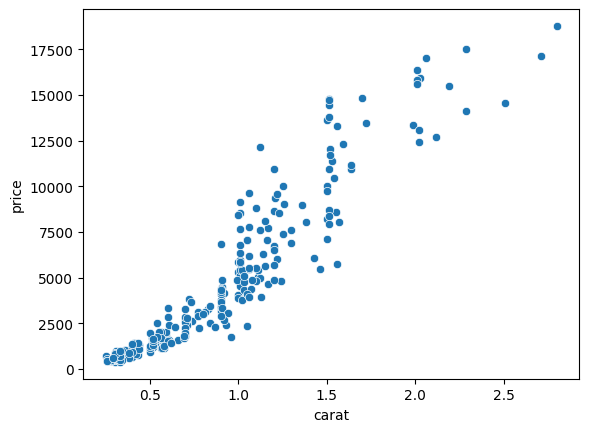

In [6]:
d_sample = diamonds.sample(300)
sns.scatterplot(d_sample, x = 'carat', y= 'price')


when diamonds get larger, they get rare and expensive, so the plot looks like parabola

<Axes: xlabel='carat_sq', ylabel='price'>

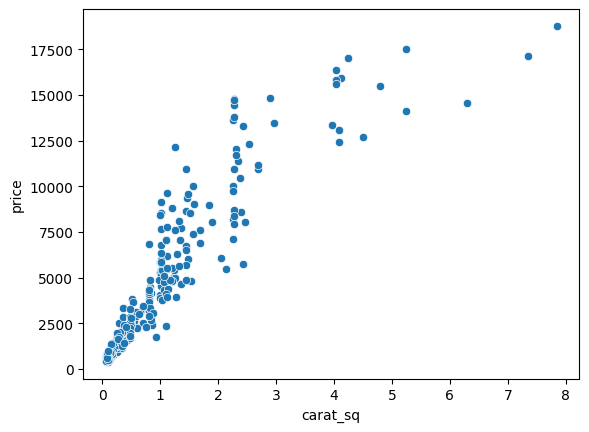

In [7]:
d_sample['carat_sq'] = d_sample['carat']**2
sns.scatterplot(d_sample, x ='carat_sq', y = 'price')

In [11]:
features =[
    'carat',
    'carat_sq',
    'depth',
    'table',
    'x',
    'y'
]
X = sm.add_constant(d_sample.loc[:, features])
y = d_sample['price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     452.1
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          6.80e-145
Time:                        15:09:05   Log-Likelihood:                -2583.3
No. Observations:                 300   AIC:                             5181.
Df Residuals:                     293   BIC:                             5207.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.561e+04   9005.394      5.064      0.000    2.79e+04    6.33e+04
carat       2.738e+04   3737.351      7.327      0.000       2e+04    3.47e+04
carat_sq   -3103.4306    676.959     -4.584      0.000   -4435.749   -1771.112
depth       -380.1527     83.592     -4.548      0.000    -544.670    -215.636
table       -101.9362     38.281     -2.663      0.008    -177.277     -26.595
x          -5543.5038   1348.765     -4.110      0.000   -8198.000   -2889.008
y             51.9416   1372.230      0.038      0.970   -2648.736    2752.619
==============================================================================
Omnibus:                       52.029   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.088
Skew:                           0.710   Prob(JB):                     3.51e-39
Kurtosis:                       6.486   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""